## Class Tanımlama

In [971]:
# Verinin incelenmesi için oluşturulan sınıf.
#Bu sınıf otomatik olarak veri hakkında ön bilgi verecek ve görselleştirilmesini sağlayacak

class DataInspect:
    
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    
    def __init__(self,data):
        self.data = data
    
    
    #Veri için açıklayıcı özet çıkaracak fonksiyon
    def preInfo(self):
        #Verinin ilk 10 satırını gösterme
        print('\033[1m' + "First 10 row of the data\n" + '\033[0m')
        print(self.data.head(10))
        
        #Verinin veri tiplerini görüntüleme
        print('\033[1m' + "\n\nTypes of the columns\n" + '\033[0m')
        print(self.data.dtypes)
        
        #Verinin özet açıklaması ( mean , std. min , max vb.)
        print('\033[1m' + "\n\nDescription of the data\n" + '\033[0m')
        print (self.data.describe())
        
        #Verideki eksik değerlerin kolonlara göre sayısı
        print('\033[1m' + "\n\nNumber of null values\n" + '\033[0m')
        print(self.data.isnull().sum(axis = 0))
        
    # Verinin görselleştirilmesi için çağırılan fonksiyon    
    def preGraph(self):
        
        print('\033[1m' + "\n\nData Visualiation\n" + '\033[0m')
      
        newplt=self.plt
        
        
        #Verideki veri tiplerine göre görselleştirme
        #Eğer kolon tipi sayısal değer ise kdeplot , object ise countplot çizdirilecek 
        for i in range(len(self.data.columns)):
               
            
            if (self.data.dtypes[i] != "object"):
                f,axes = newplt.subplots(1,1)
                sns.distplot(self.data.iloc[:,i],bins = 20)
                
            else:
                f,axes = newplt.subplots(1,1)
                sns.countplot(self.data.iloc[:,i],data=self.data)
        
        # Verinin boxplot gösterimi
        newplt.figure()
        sns.boxplot(data=self.data)
        
        # Verinin Korelasyon Grafiği Gösterimi
        fig,ax = newplt.subplots(figsize=(5, 5))
        sns.heatmap(self.data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
        newplt.show()
        
        
    def testStatsPlot(self):
        
        print('\033[1m' + "\n\nTest Statistics\n" + '\033[0m')
        
        newplt=self.plt
        
        print('\033[1m' + "\n\nProbability Plots of Data \n" + '\033[0m')
        nonObjColumns =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                
        for i in range(0,len(nonObjColumns),2):
   
            figg=newplt.figure(figsize=(15,5))
            ax1=newplt.subplot(1,2,1)
            res=stats.probplot(self.data.iloc[:,nonObjColumns[i]].dropna(),dist = "norm", plot=plt)
            ax1.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i]]))
        
            if(i!=len(nonObjColumns)-1):
            
                ax2=newplt.subplot(1,2,2)
                res2=stats.probplot(self.data.iloc[:,nonObjColumns[i+1]].dropna(),dist = "norm", plot=plt)
                ax2.set_title("Probability Plot of '{0}' Column ".format(self.data.columns[nonObjColumns[i+1]]))
                plt.show()
     
    # Bağımsız değişkenlerin normal dağılıma sahip olup olmadığını girilen alpha değeri ile kontrol ediyor 
        
    def testStatsUnifTest(self,alpha):
        
        alphaValue=alpha
        pValueArray=[]
        statValueArray=[]
        comparisionWithAlfa=[]
        
        
        nonObjColumns =[]
        columnNames =[]
        for j in range (len(self.data.columns)):
            if (self.data.dtypes[j] != "object"):
                nonObjColumns.append(j)
                columnNames.append(self.data.columns[j])
        
        for i in range(0,len(nonObjColumns)):
            stat , p = stats.shapiro(self.data.iloc[:,nonObjColumns[i]].dropna())
            statValueArray.append(round(stat,4))
            pValueArray.append(round(p,9))
            if (p<alphaValue):
                comparisionWithAlfa.append('Yes')
            else:
                comparisionWithAlfa.append('No')
                
        statValueArray=np.array([statValueArray])
        pValueArray=np.array([pValueArray])
        comparisionWithAlfa=np.array([comparisionWithAlfa])
        
        pStatsDf=pd.DataFrame(np.concatenate((pValueArray,statValueArray,comparisionWithAlfa), axis=0))
        pStatsDf.columns =columnNames
        pStatsDf.index=["P Value","Statistics","p<a ?"]
        return (pStatsDf)
    
    #Burada, verideki kategorik bağımsız değişkenler gruplandırılıp bağımlı değişken değerleri dağılımları arasında-  
    #anova testi yapıyorum
    def anovaCatTest(self,response):
        objColumns=[]
        objColumnNames=[]
        objColumnGroups=[]
        dataToTest=[]
        twoGroupsComp=[]
        
        for j in range (len(self.data.columns)):
                    if (self.data.dtypes[j] == "object"):
                        objColumns.append(j)
                        objColumnNames.append(self.data.columns[j])
                        
                                
        for k in range (len(objColumns)):
            for l in range (len(self.data[objColumnNames[k]].unique())):
                if(isinstance(self.data[objColumnNames[k]].unique()[l], str)): # null ları almıyor
                    objColumnGroups.append(self.data[objColumnNames[k]].unique()[l])
                    deger = self.data[objColumnNames[k]].unique()[l]
                    dataToTest.append(self.data[response].iloc[:][self.data[objColumnNames[k]]==deger])
            if(len(objColumnGroups)<3):
                print ('\033[1m'+"\nANOVA testi en az üç grup arasında yapılabilir."+'\033[0m')
                if(len(objColumnGroups)==2):            
                    print ("'{}' Kolonu '{}' ve '{}' Grupları arasındaki t-Testi Sonucu :\n{} ".format(objColumnNames[0],objColumnGroups[0],objColumnGroups[1],stats.ttest_ind(*dataToTest)))
                else:
                    pass
            else:        
                print ("\n'{}' Kolonu Anova Testi (Aynı Anda Karşılaştırılan Gruplar {} ) \nSonucu : ".format(objColumnNames[k],objColumnGroups))
                print(stats.f_oneway(*dataToTest)) 
                
                print('\033[1m'+"\nİkili Karşılaştırma P değerleri Matrisi\n"'\033[0m')
                twoGroupsComp=np.ones(shape=(len(objColumnGroups),len(objColumnGroups)))
                for g in range (len(twoGroupsComp)):
                    for f in range (len(twoGroupsComp)):
                        
                        deger1 = objColumnGroups[g]
                        deger2= objColumnGroups[f]
                        stat,p = stats.f_oneway((self.data[response].iloc[:][self.data[objColumnNames[k]]==deger1]),(self.data[response].iloc[:][self.data[objColumnNames[k]]==deger2]) )
                        twoGroupsComp[g,f]=round(p,6)
                newdf=pd.DataFrame(twoGroupsComp)
                newdf.columns =objColumnGroups
                newdf.index=objColumnGroups
                return (newdf)
            
            twoGroupsComp=[]    
            objColumnGroups=[]
            dataToTest=[]    
            
            
    def anovaNumTest(self,response):
            objColumns=[]
            objColumnNames=[]
            objColumnGroups=[]
            dataToTest=[]
            twoGroupsComp=[]
            
            for j in range (len(self.data.columns)):
                        if (self.data.dtypes[j] != "object"):
                            objColumns.append(j)
                            objColumnNames.append(self.data.columns[j])
                            
                                    
            
    
        

# Ödev 1 - Test

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np

In [345]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


Historical data were gathered on 5960 bank customers to determine whether
a customer is a good or bad credit risk for a home equity loan. Bad risk
customers are more likely to default on the loan.

BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).
LOAN: The amount of the loan requested
MORTDUE: How much the customer needs to pay on their mortgage
VALUE: Assessed valuation (An assessed value is the dollar value assigned to a property to measure applicable taxes)
REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
JOB: Broad job category
YOJ: Years on the job
DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
CLAGE: Age of oldest trade line (oldest tradeline= credit account)
NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
CLNO: Number of trade lines
DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)

In [862]:
sinif1 = DataInspect(data) # oluşturduğum sınıfın hmelq datası ile initialize edilmesi

In [14]:
# Oluşturulan sınıftan Veri için açıklayıcı istatistik fonksiyonunun çağırılması
sinif1.preInfo()

First 10 row of the data

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   
5    0  17200   39316.0   66978.0  DebtCon  NaN   4.0    0.0     0.0   99.99   
6    0  82200   23197.0  110481.0  HomeImp  NaN  26.0    0.0     1.0  127.77   
7    0   6200   45356.0   82054.0  DebtCon  NaN   2.0    0.0     0.0  201.33   
8    0  17400  113890.0  135146.0  DebtCon  NaN  16.0    0.0     0.0  174.10   
9    0   8900   63342.0   78275.0  DebtCon  NaN  19.0    0.0     0.0  162.20   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26



Data Visualiation



C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid va

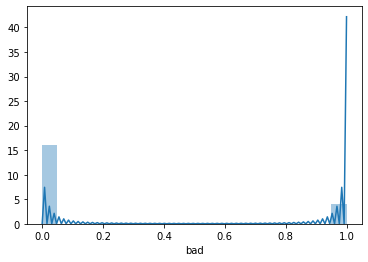

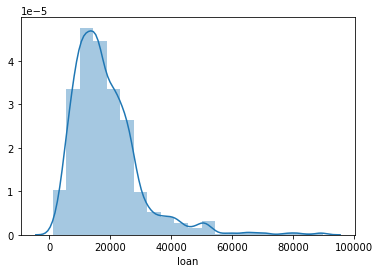

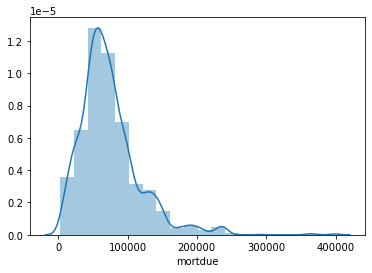

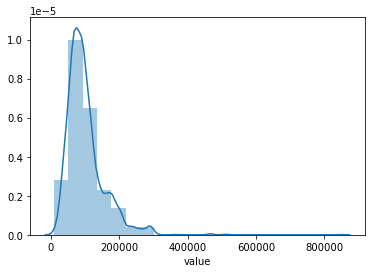

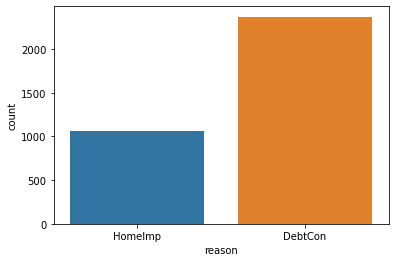

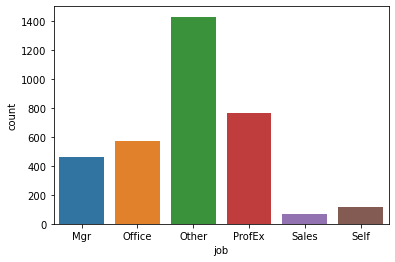

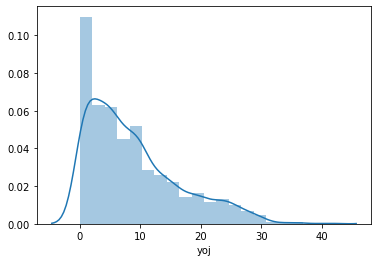

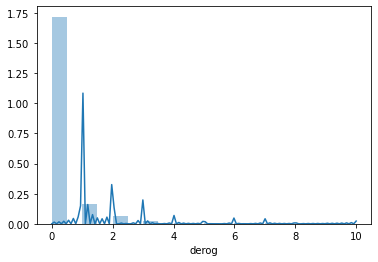

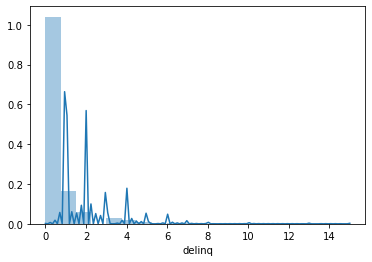

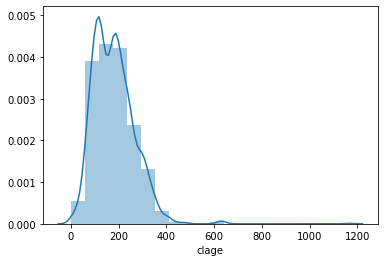

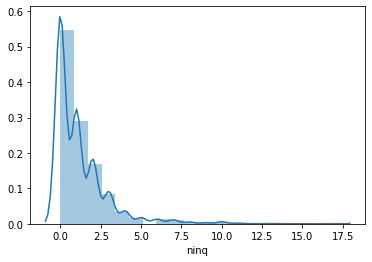

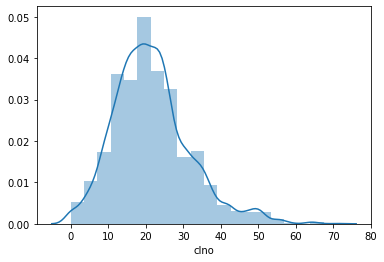

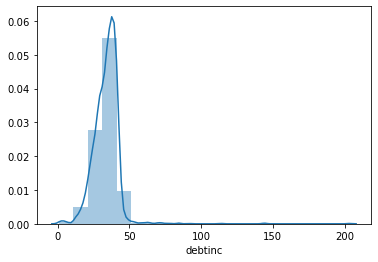

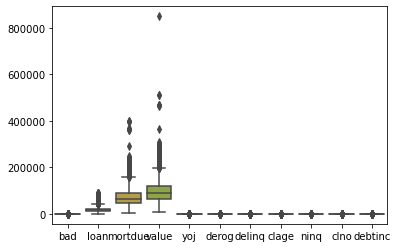

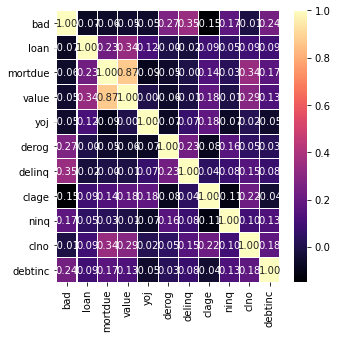

In [19]:
# Oluşturulan sınıftan Veri için görselleştirme fonksiyonunun çağırılması
sinif1.preGraph()

# Ödev 2 - Test (Veri istatistiksel testleri)

In [1086]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import statsmodels.api as sm
import seaborn as sns

In [584]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [858]:
sinif1 = DataInspect(data) # Oluşturduğum veri inceleme sınıfının çağırılması

## Olasılık Tablosu İncelenmesi



Test Statistics



Probability Plots of Data 



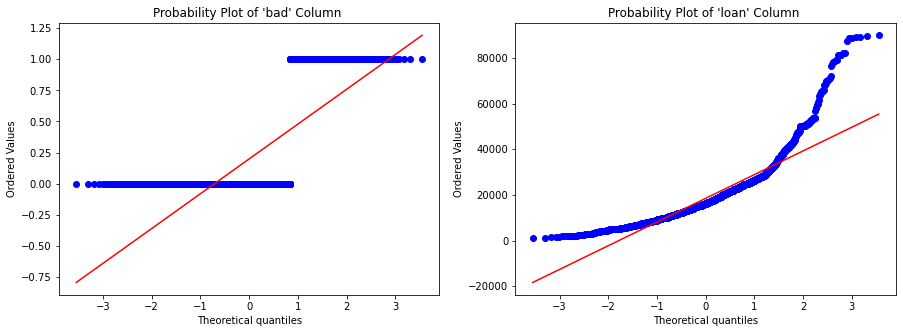

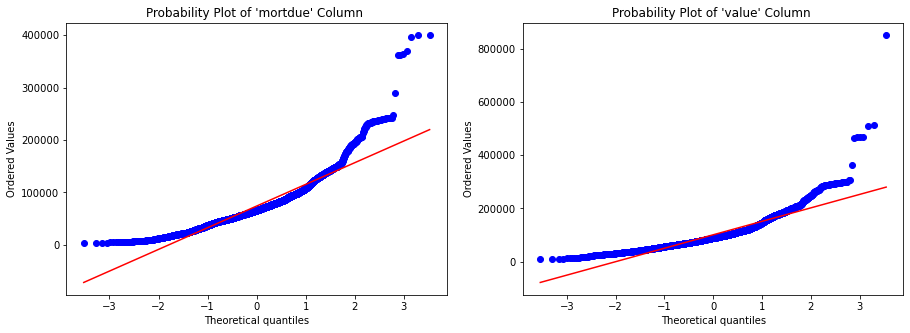

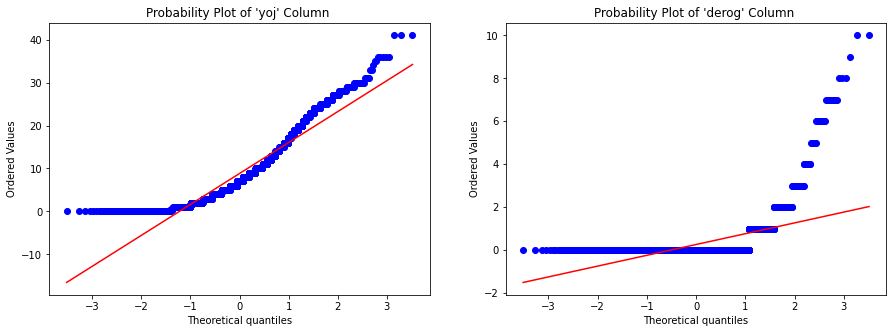

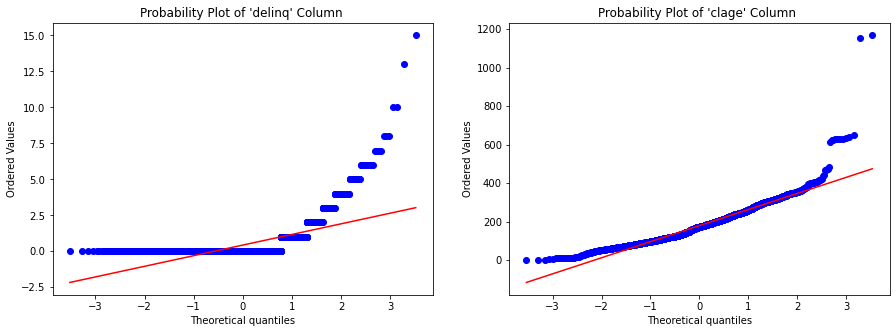

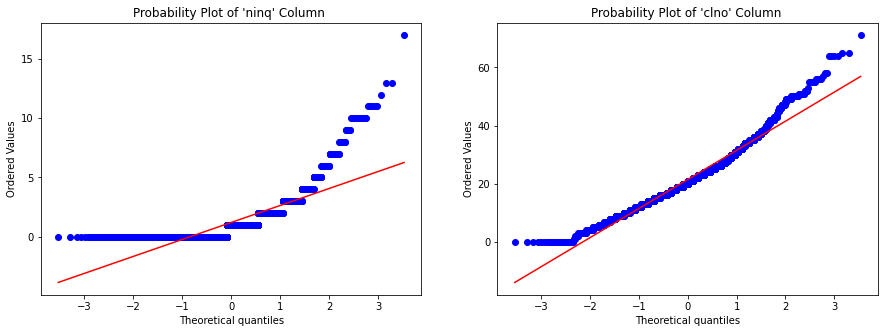

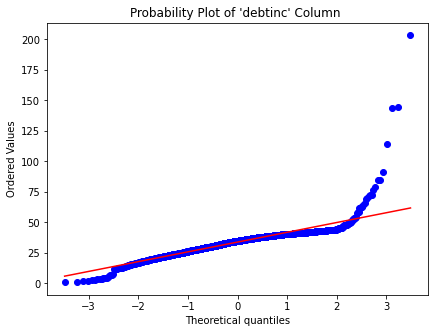

In [588]:
sinif1.testStatsPlot() # Oluşturduğum sınıftan bağımsız değişkenlerin normal dağılım olasılık dağılımı grafiği.

### Olasılık Tablosu Çıkarımı

-Kategorik olmayan değişkenlerin Probability Plotlarına bakıldığında bağımsız değişkenlerin hiçbirinin
normal dağılıma sahip olmadığı görülmekte.

-Tablolardaki çoğu extrem değerlerin sağ tarafta olduğu görünüyor. Bu da çoğu tablonun sağ kuyruklu (right skewed) olduğunu gösteriyor. 

## Normal Dağılım Testi ve P Değeri İncelenmesi

In [859]:
sinif1.testStatsUnifTest(0.05) # Oluşturduğum sınıf kullanılarak verilen alfa değerine göre normal dağılım p-value değerleri.

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
P Value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Statistics,0.4892,0.8493,0.8818,0.8479,0.9036,0.3379,0.4505,0.92,0.6911,0.9661,0.7853
p<a ?,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


### Normal Dağılım Testi ve P Değeri İncelenmesi Çıkarımı

Yukarıda oluşturulan olasılık tablosundan da görüldüğü gibi ,bütün kategorik olmayan bağımsız değişkenlerin p değerleri alpha=0.05 'den küçük. Bu da null hypotesis olan "Veriler Normal Dağılıma Sahiptir" hipotezini reddetmemizi işaret ediyor. 

Bu nedenle kategorik olmayan değişkenler için anova testi uygun görünmemekte. 

When to use a one-way ANOVA
Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories).


Assumptions of ANOVA
The assumptions of the ANOVA test are the same as the general assumptions for any parametric test:

Independence of observations: the data were collected using statistically-valid methods, and there are no hidden relationships among observations. If your data fail to meet this assumption because you have a confounding variable that you need to control for statistically, use an ANOVA with blocking variables.
Normally-distributed response variable: The values of the dependent variable follow a normal distribution.
Homogeneity of variance: The variation within each group being compared is similar for every group. If the variances are different among the groups, then ANOVA probably isn’t the right fit for the data.

### Kategorik değişkenlerin gruplar arasındaki farklılıkları kontrol etme

In [863]:
sinif1.anovaCatTest(response="bad")


ANOVA testi en az üç grup arasında yapılabilir.
'reason' Kolonu 'HomeImp' ve 'DebtCon' Grupları arasındaki t-Testi Sonucu :
Ttest_indResult(statistic=3.0523376655101577, pvalue=0.00228808065426651) 

'job' Kolonu Anova Testi (Aynı Anda Karşılaştırılan Gruplar ['Mgr', 'Office', 'Other', 'ProfEx', 'Sales', 'Self'] ) 
Sonucu : 
F_onewayResult(statistic=9.75066651874233, pvalue=2.9035436331939114e-09)

İkili Karşılaştırma P değerleri Matrisi



,Mgr,Office,Other,ProfEx,Sales,Self
Mgr,1.000000,0.000026,0.996525,0.004878,0.040307,0.156746
Office,0.000026,1.000000,0.000000,0.077510,0.000003,0.000011
Other,0.996525,0.000000,NaN,0.000343,0.029621,0.122557
ProfEx,0.004878,0.077510,0.000343,1.000000,0.000229,0.000864
Sales,0.040307,0.000003,0.029621,0.000229,1.000000,0.464158
Self,0.156746,0.000011,0.122557,0.000864,0.464158,1.000000


### Kategorik olmayan değişkenlerin gruplar arasındaki farklılıkları kontrol etme

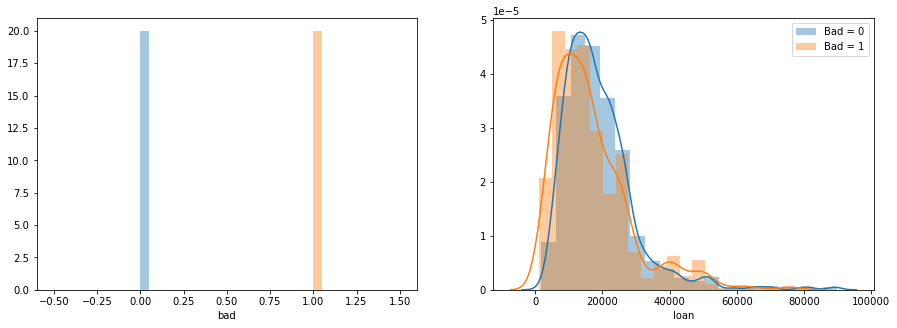

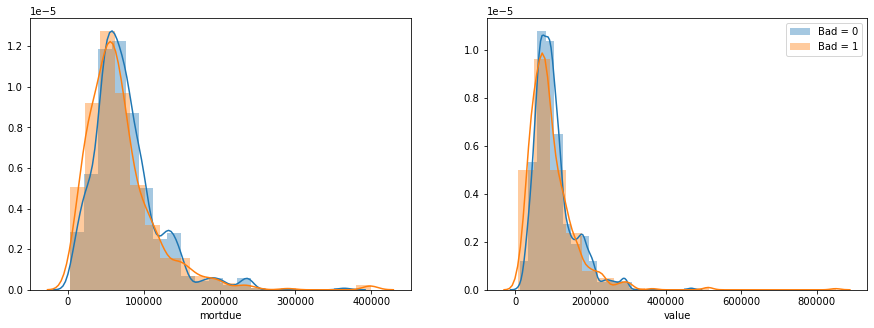

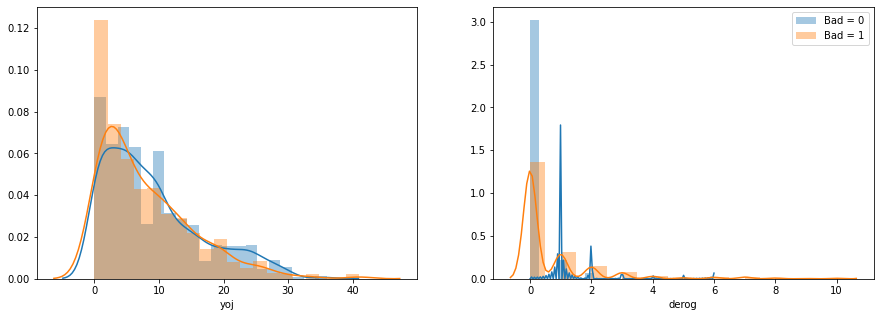

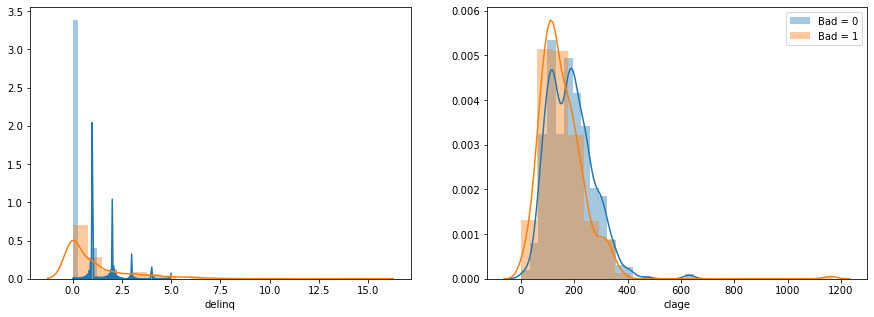

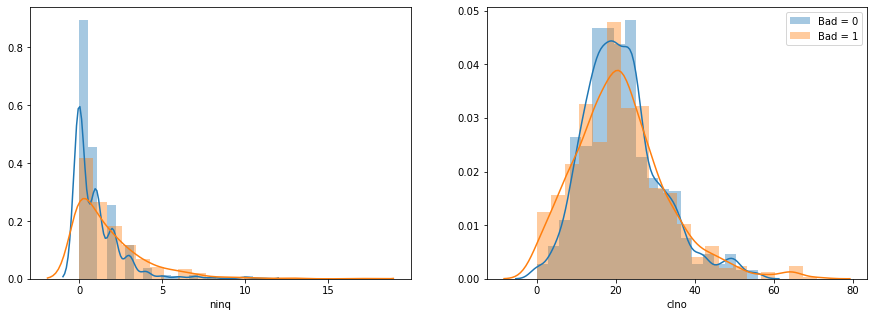

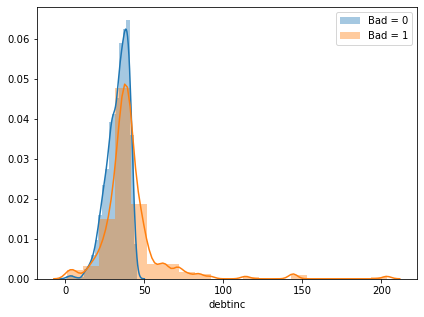

In [969]:
import warnings
warnings.filterwarnings("ignore")

nonObjColumns =[]
for j in range (len(data.columns)):
    if (data.dtypes[j] != "object"):
        nonObjColumns.append(j)
        
for i in range(0,len(nonObjColumns),2):
    for k in range(1,2):   
        figg=plt.figure(figsize=(15,5))
        ax1=plt.subplot(1,2,k)
        res=sns.distplot(data.iloc[:,nonObjColumns[i]][data.bad==0].dropna(),bins = 20)
        ax2=plt.subplot(1,2,k)
        res=sns.distplot(data.iloc[:,nonObjColumns[i]][data.bad==1].dropna(),bins = 20)
        
        if(i!=len(nonObjColumns)-1):
            ax3=plt.subplot(1,2,k+1)
            res=sns.distplot(data.iloc[:,nonObjColumns[i+1]][data.bad==0].dropna(),bins = 20)
            ax4=plt.subplot(1,2,k+1)      
            res=sns.distplot(data.iloc[:,nonObjColumns[i+1]][data.bad==1].dropna(),bins = 20)
        
    plt.legend(labels=["Bad = 0","Bad = 1"])
    plt.show();
    
        

In [1127]:
objColumns=[]
objColumnNames=[]
dataToTest=[]
responseGroupValues = []
response="bad"
pValues = []
for j in range (len(data.columns)):
            if (data.dtypes[j] != "object"):
                objColumns.append(j)
                objColumnNames.append(data.columns[j])

                
                
for k in range (len(objColumns)):
    
    first=data.iloc[:,objColumns[k]][data.bad==0].dropna()
    second=data.iloc[:,objColumns[k]][data.bad==1].dropna()
    stat,p=stats.f_oneway(first,second)
    pValues.append(round(p,4))
newDf=pd.DataFrame(pValues)
newDf.index=objColumnNames
newDf.T               

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0.0,0.0,0.0013,0.0029,0.0032,0.0,0.0,0.0,0.0,0.5983,0.0


### Kategorik olmayan değişkenlerin gruplar arasındaki farklılıkları kontrol etme Çıkarımı!

Yukarıdaki KDE plot her bir kategorik olmayan değişkenin kendi aralarında Bad değerlerine göre guruplandırılmış halidir.
Plotlara baktığımızda veriler arasında en çok benzerliğin "clno" değişkeninde olduğu görülmekte.

Aşağıdaki Tablo ise bad değerlerine göre ayrılmış değişkenlerin T testi P value sonuçlarıdır. Bu sonuçları da göz önünde bulundurunca sadece "clno" değer alfadan büyük görünmekte. Bu da demek oluyor ki clno değişkeni için Bad puanı değerlendirmekte anlamlı bir farklılık bulunmuyor. Clno değişkeni veriden kaldırılabilir. 
